# Clustering

## Assignment Details

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

## Required Python Packages 

In [39]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder 
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [147]:
dat = pd.read_csv('clusteringdata.csv', encoding='latin1')
dat = dat[(dat != '?').all(axis=1)]
dat.head(5)

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [148]:
dat.shape

(5000, 15)

In [154]:
lableenc = LabelEncoder() #We take the instance of label Encode as lableenc
WorkClass= lableenc.fit_transform(dat.WorkClass)
dat["WorkClass"]=WorkClass
NativeCountry = lableenc.fit_transform(dat.NativeCountry)
dat["NativeCountry"]=NativeCountry
Sex= lableenc.fit_transform(dat.Sex)
dat["Sex"]=Sex
Race= lableenc.fit_transform(dat.Race)
dat["Race"]=Race
Class = lableenc.fit_transform(dat.Class)
dat["Class"]=Class
Occupation= lableenc.fit_transform(dat.Occupation)
dat["Occupation"]=Occupation
Education= lableenc.fit_transform(dat.Education)
dat["Education"]=Education
Relationship= lableenc.fit_transform(dat.Relationship)
dat["Relationship"]=Relationship
MaritalStatus= lableenc.fit_transform(dat.MaritalStatus)
dat["MaritalStatus"]=MaritalStatus


In [22]:
dat.head(3)# Checking the first 3 records to see if pandas is loading CSV properly.

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,6,77516,9,13,4,1,1,4,1,2174,0,40,37,0
1,50,5,83311,9,13,2,4,0,4,1,0,0,13,37,0
2,38,3,215646,11,9,0,6,1,4,1,0,0,40,37,0


## K-Means Clustering

### Determine “k” value from the elbow method

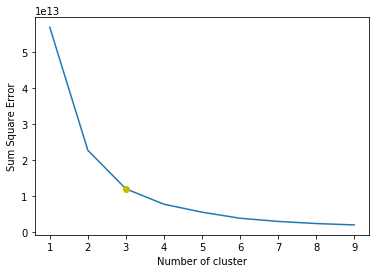

Optimal value for k is 3


In [51]:
#########################begin code for Task 1-a

for val in range(1, 10,1):
    kmeans = KMeans(n_clusters = val).fit(dat)

Sum_Square_Error={}   #Declaring an emptty set for performing K-means clustering
for val2 in range(1, 10,1):
    kmeans = KMeans(n_clusters=val2, max_iter=1000).fit(dat)
    dat["clusters"]=kmeans.labels_
    Sum_Square_Error[val2] = kmeans.inertia_ 
plt.figure()
plt.plot(list(Sum_Square_Error.keys()), list(Sum_Square_Error.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum Square Error")
plt.plot(3,Sum_Square_Error[3],'yo',marker='o')
plt.show()
print("Optimal value for k is 3")


#########################begin code for Task 1-a


### Visualization for K-Means Clustering

In [74]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing

X_train = dat.sample(frac=0.70, random_state=0)   #Here we are giving 70% as training 
X_test = dat.drop(X_train.index)
y_train = X_train.pop('Class')          #To train, we have to remove the target column
y_test = X_test.pop('Class')            #The same, we do with testing also

###################end code for Task 1-b-1

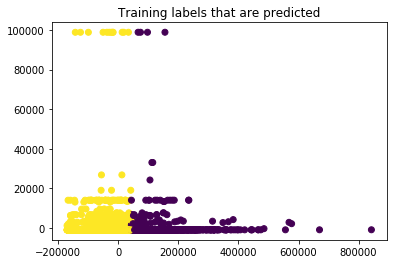

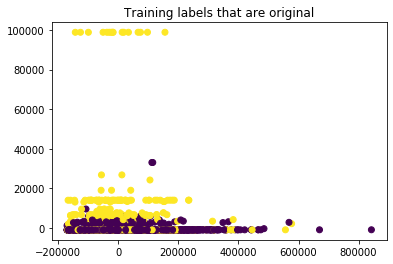

In [92]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)   #A K-Means model is initialized
vau=kmeans.predict(X_train)    #We are predicting indexes of clusters for each sample

X_train_pca = PCA(n_components=2).fit_transform(X_train)  #Data is fitted 

x = X_train_pca[:, 0]    
y = X_train_pca[:, 1]
plt.title("Training labels that are predicted")
plt.scatter(x,y,c=vau)
plt.show()
plt.title("Training labels that are original")
plt.scatter(x,y,c=y_train)
plt.show()

###################end code for Task 1-b-2


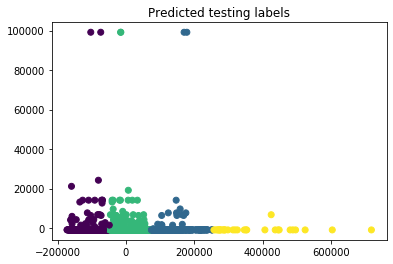

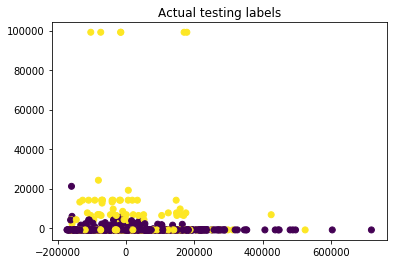

In [98]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels

kmeans = KMeans(n_clusters=4, random_state=0).fit(X_test)
bau=kmeans.predict(X_test)
X_test_pca = PCA(n_components=2).fit_transform(X_test)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
plt.title("Predicted testing labels")
plt.scatter(x,y,c=bau)
plt.show()
plt.title("Actual testing labels")
plt.scatter(x,y,c=y_test)
plt.show()
###################end code for Task 1-b-3

In [97]:
###################begin code for Task 1-b-4: Print out a confusion matrix
print("Training data- Confusion matrix \n",confusion_matrix(y_train,vau))
print("Training data- Confusion matrix \n",confusion_matrix(y_test,bau))

###################end code for Task 1-b-4

Training data- Confusion matrix 
 [[ 759 1890]
 [ 195  656]]
Training data- Confusion matrix 
 [[387 209 509  25]
 [131  71 163   5]
 [  0   0   0   0]
 [  0   0   0   0]]


# TASK 2: Hierarchical Agglomerative  Clustering

##  Finding the best Hierarchical Agglomerative Clustering Model

Let's perform Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Using F1 score for evaluation and take n_clusters = 2.


In [104]:
###################begin code for Task 2-a: Print out a confusion matrix

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import f1_score
pdm_train = X_train
cod = pairwise_distances(pdm_train,metric='cosine')
eud = pairwise_distances(pdm_train,metric='euclidean')
mad = pairwise_distances(pdm_train,metric='manhattan')

cc = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cod) #Getting Agglomerative Clusterig model for linkage and cosine
ccf1 = f1_score(y_train,cc)
 
ec = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(eud) #Getting Agglomerative Clusterig model for linkage and Eucledian
ecf1 = f1_score(y_train,ec)


mc = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(mad) #Getting Agglomerative Clusterig model for linkage and Manhattan
mcf1 = f1_score(y_train,mc)


ca = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cod)#Getting Agglomerative Clusterig model for average linkage and Cosine
caf1 = f1_score(y_train,ca)


ea = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(eud)#Getting Agglomerative Clusterig model for average linkage and eucledian
eaf1 = f1_score(y_train,ea)

ma = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(mad)#Getting Agglomerative Clusterig model for  average linkage and Manhattan
maf1 = f1_score(y_train,ma)

print("The f-1 Score values for complete linkage, average linkage for manhattan, cosine, eucledian distance are as follows:")
print("F1-score for complete linkage and manhattan", mcf1)
print("F1-score for complete linkage and cosine", ccf1)
print("F1-score for complete linkage and euclidean", ecf1)
print("F1-score for average linkage and manhattan", maf1)
print("F1-score for average linkage and cosine", caf1)
print("F1-score for average linkage and euclidean", eaf1)


###################end code for Task 2-a

The f-1 Score values for complete linkage, average linkage for manhattan, cosine, eucledian distance are as follows:
F1-score for complete linkage and manhattan 0.004672897196261682
F1-score for complete linkage and cosine 0.00702576112412178
F1-score for complete linkage and euclidean 0.004672897196261682
F1-score for average linkage and manhattan 0.3907040957202025
F1-score for average linkage and cosine 0.00702576112412178
F1-score for average linkage and euclidean 0.39055992596020356


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Finding the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

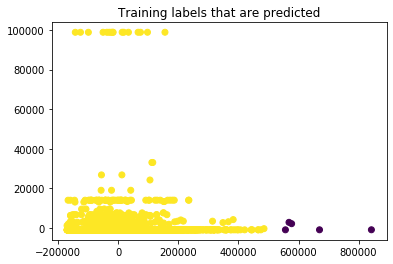

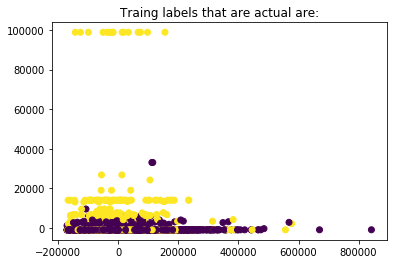

In [108]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


#Showing the predicted values versus original values

mm = {'cc':ccf1,'ec':ecf1,'mc':mcf1,'ca':caf1,'ea':eaf1,'ma':maf1}
ccv_model = max(mm,key=mm.get)

if ccv_model == 'cc':                 #Choosing cosine, complete linkage
    best_model = cc

elif ccv_model == 'ec':               ##Choosing eucledian, complete linkage
    best_model = ec

elif ccv_model == 'mc':               ##Choosing manhattan, complete linkage
    best_model = mc

elif ccv_model == 'ca':                ##Choosing cosine, average linkage
    best_model = ca

elif ccv_model == 'ea':                ##Choosing eucledian, average linkage
    best_model = ea

elif ccv_model == 'ma':                 ##Choosing manhattan, average linkage
    best_model = ma

else:                                    
    best_model = None

X_train_pca = PCA(n_components=2).fit_transform(X_train)


mbv = X_train_pca[:,0]
mcv = X_train_pca[:,1]
plt.scatter(mbv,mcv,c=best_model)
plt.title("Training labels that are predicted")
plt.show()
#Print("Hkkk")
plt.scatter(mbv,mcv,c=y_train)
plt.title("Traing labels that are actual are:")
plt.show()
###################end code for Task 2-b

# TASK 3:  WEKA Visualization of K-means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a : Visualize the k-means clustering using weka

###################start Task 3-a

The below graphs are plotted in weka, the first one is for X: Race, Colour:class,Y:cluster
The second one is for X: Race, Colour:cluster,Y:cluster
The third one is for X: Relationship, Colour:class,Y:cluster
The forth one is for X: Relationship, Colour:cluster,Y:cluster
###################end Task 3-a

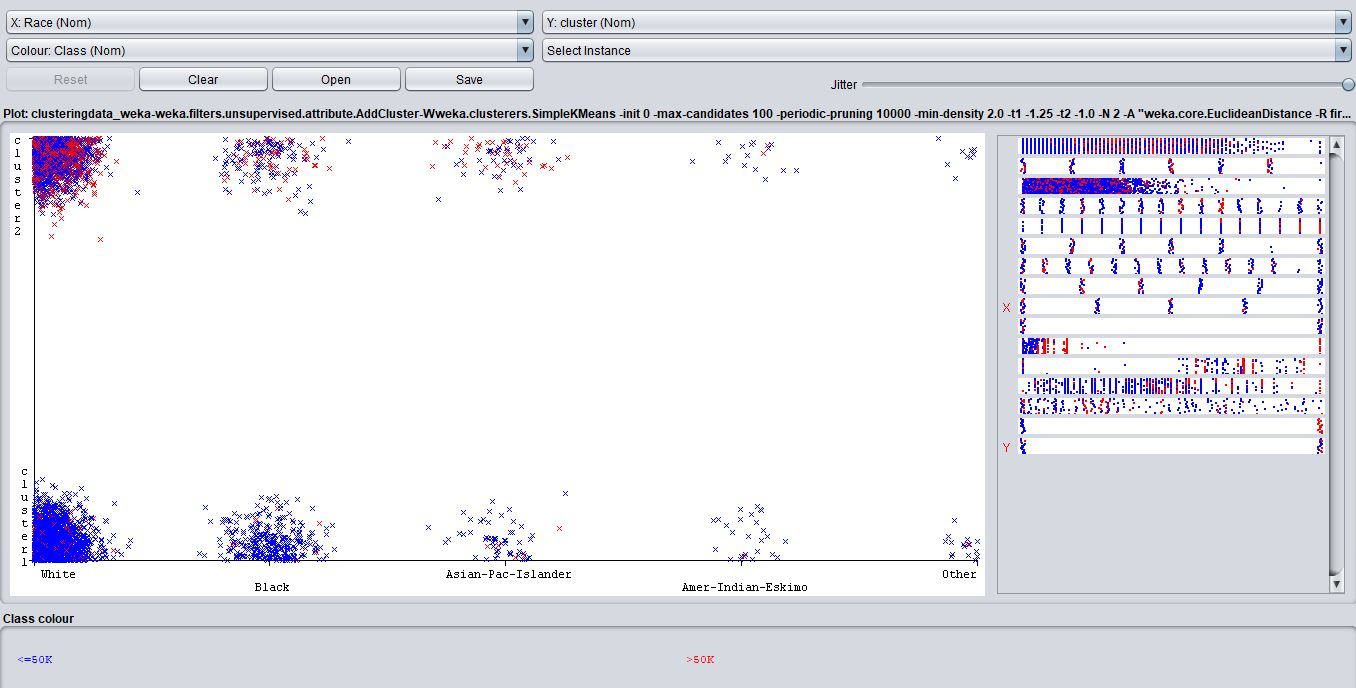

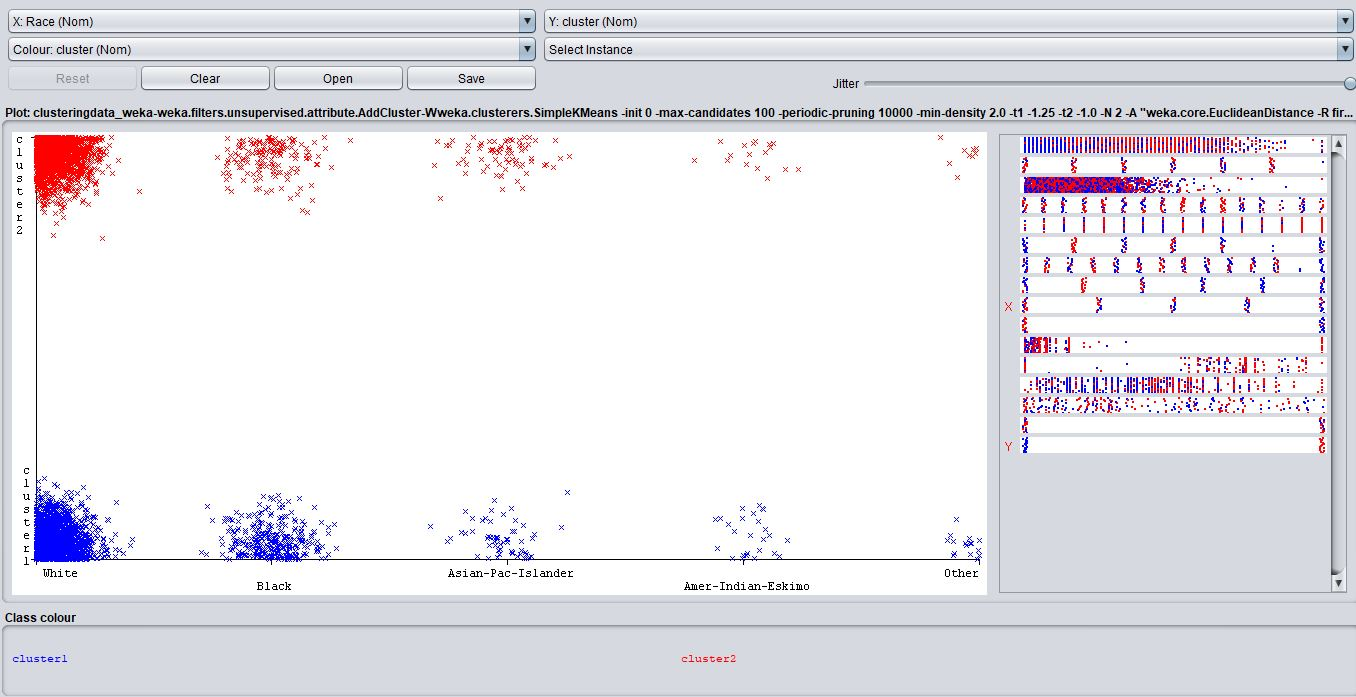

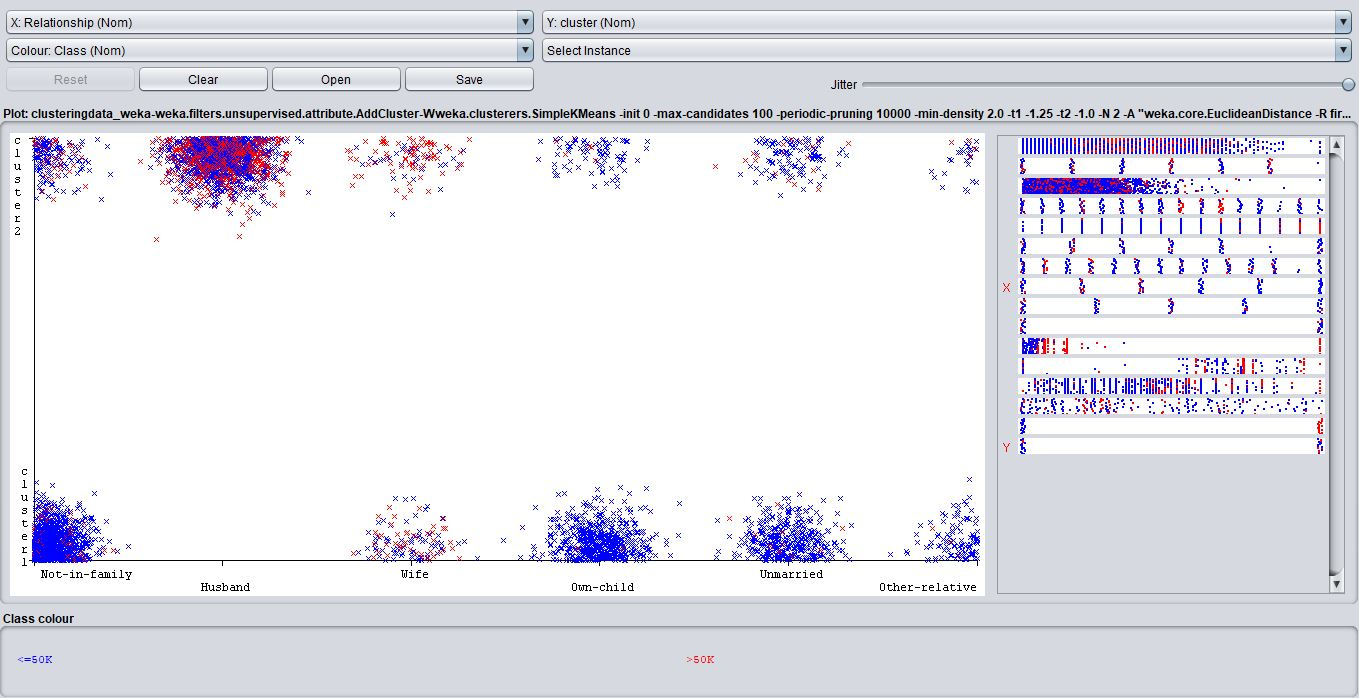

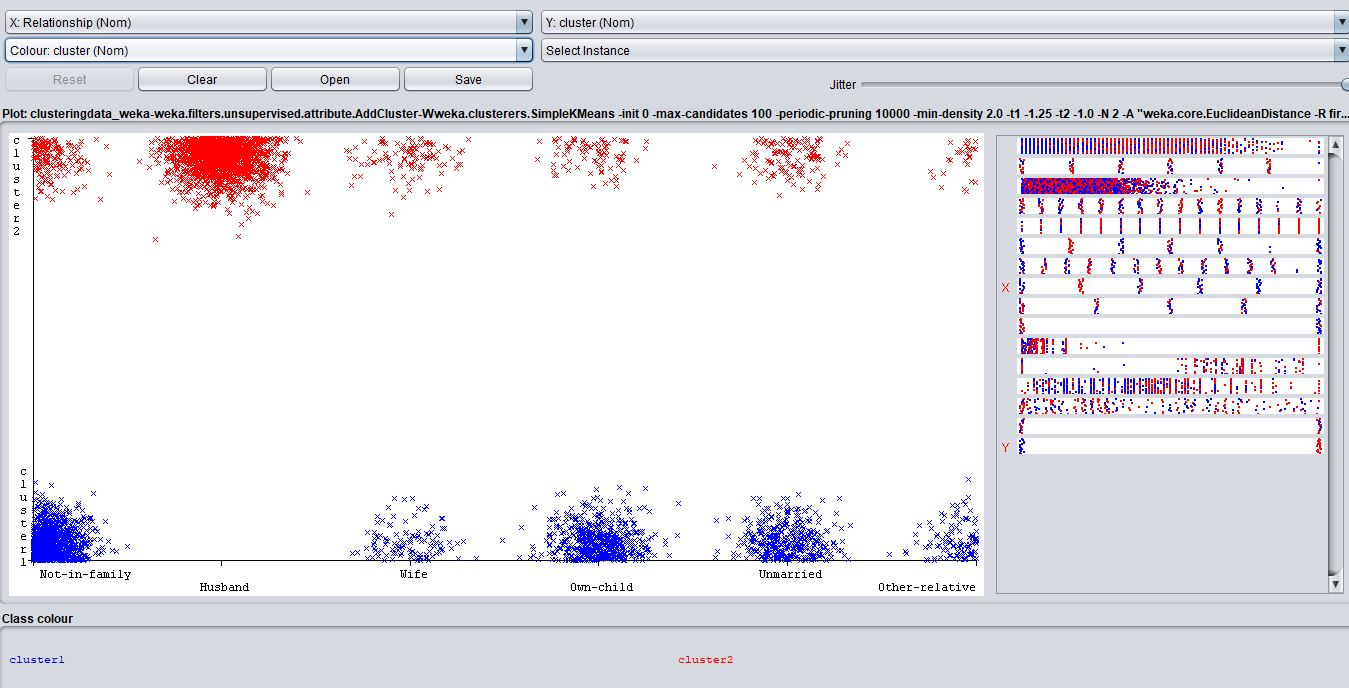


## Task 3-b : Visualize the hierarchical clustering using weka

In [ ]:
###################start Task 3-b



###################end Task 3-b

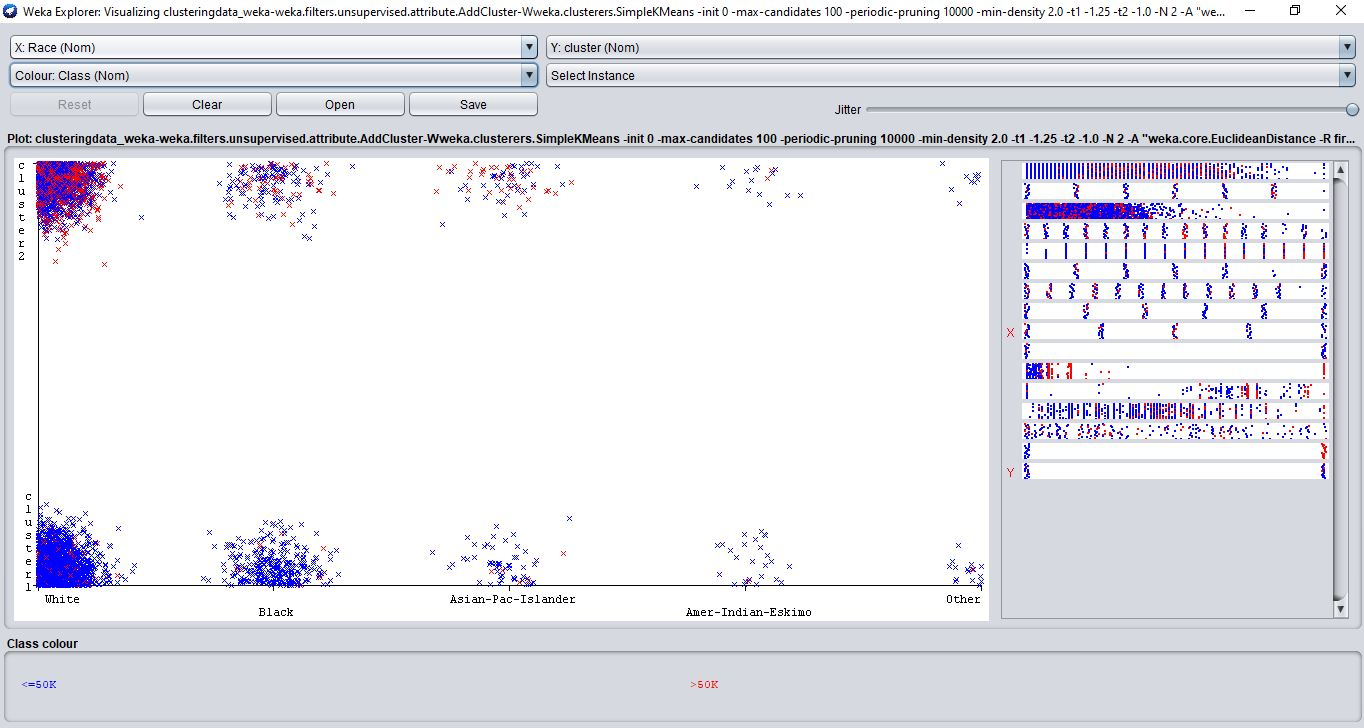

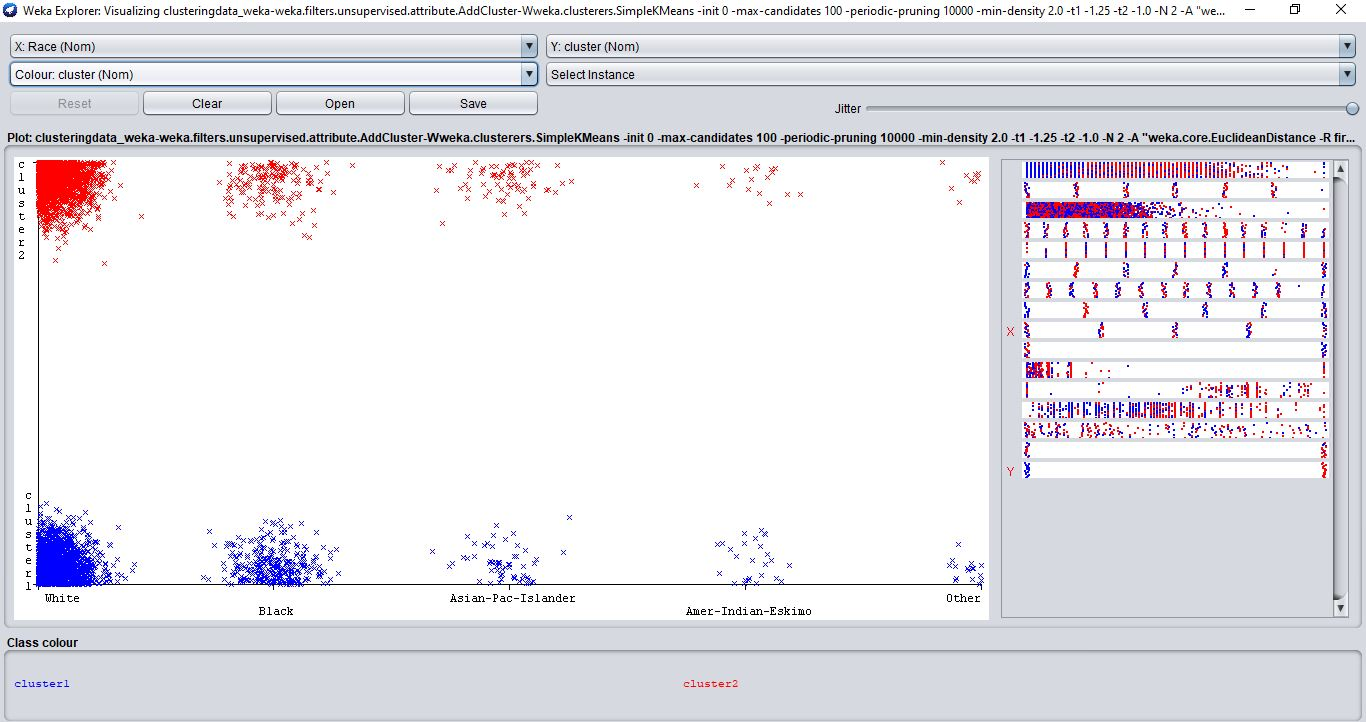

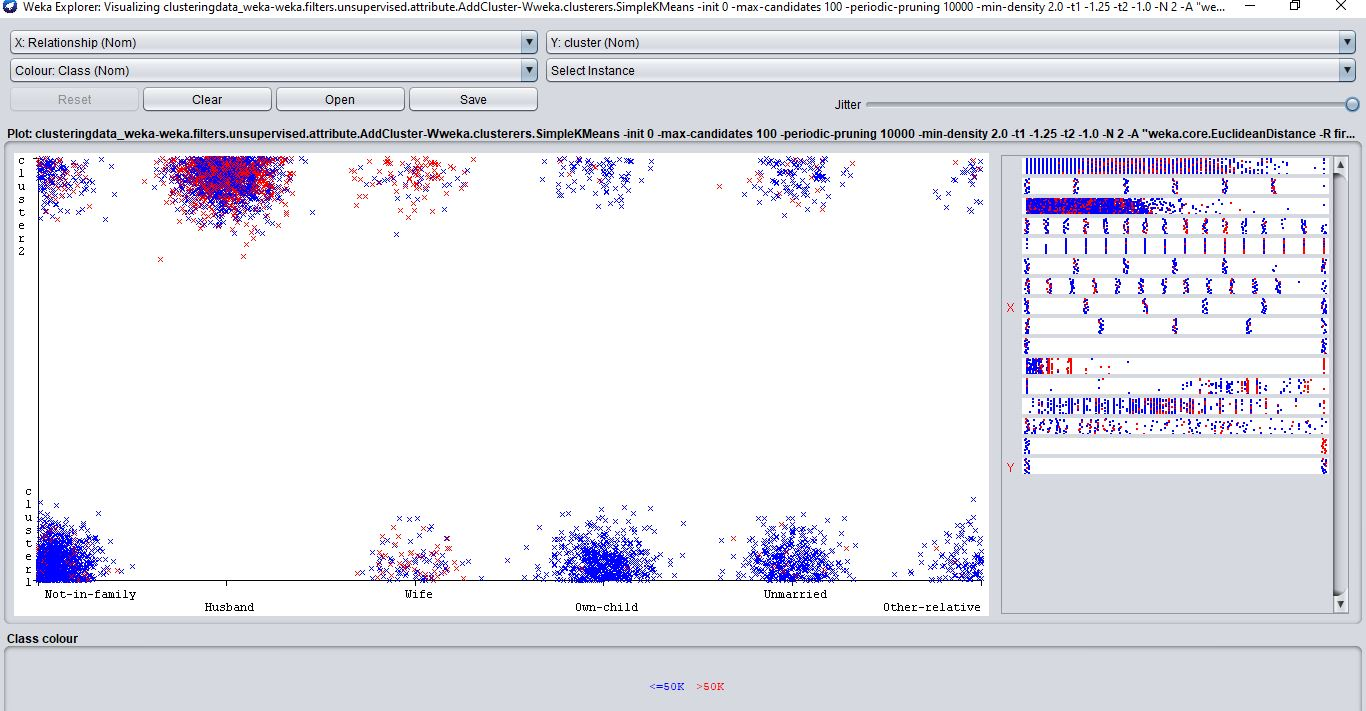

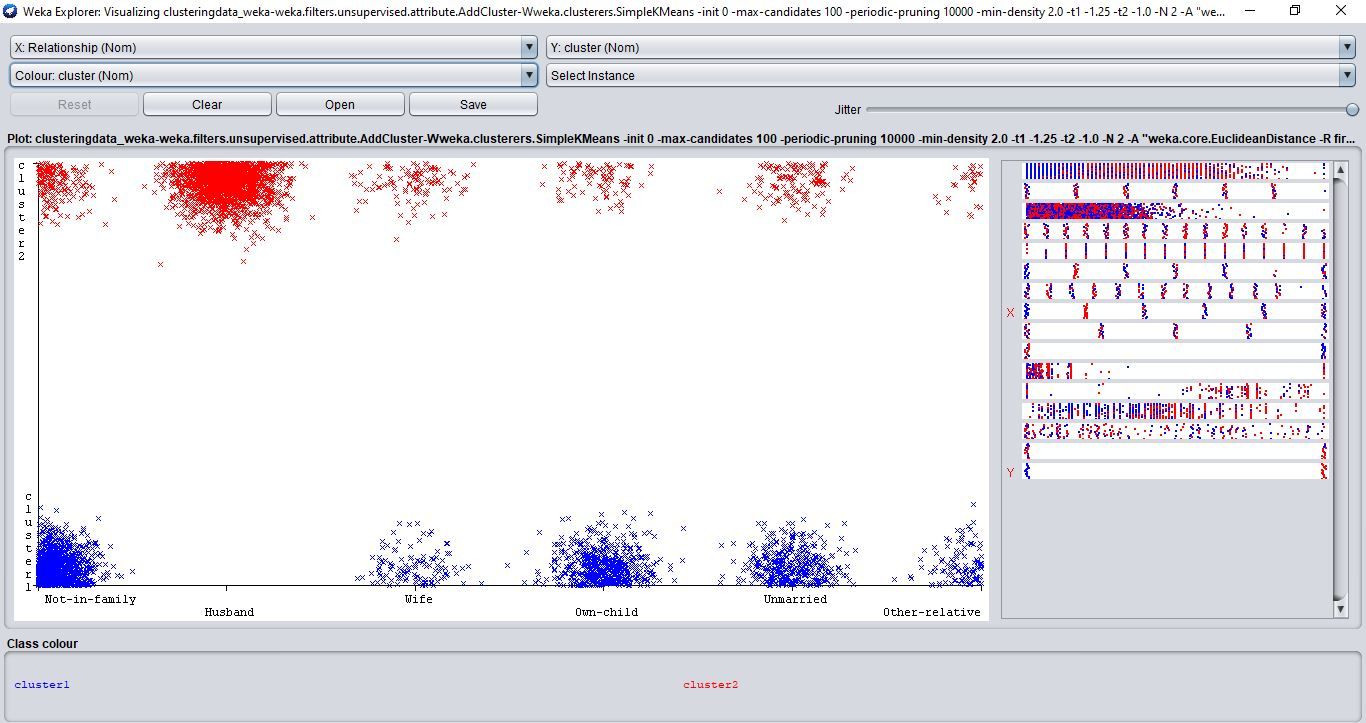

# (BONUS)
# TASK 4:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 4-a: Visualize Clusters 

Here, we use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

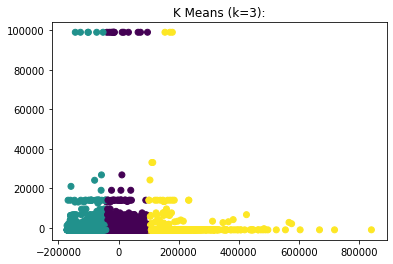

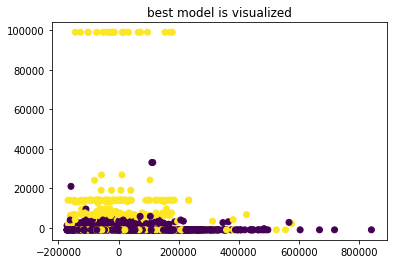

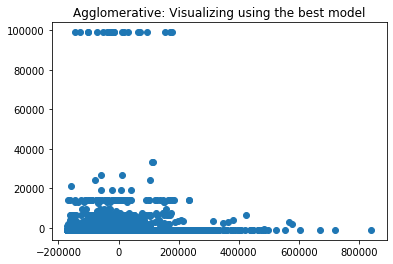

In [127]:
###################begin code for Task 4-a: Visualize the predicted training labels vs actual training labels

dataset_Kmeans = KMeans(n_clusters=3,random_state=0)
datset_fit_Kmeans = dataset_Kmeans.fit_predict(dat)


pd_t = X_train
cosine_distance = pairwise_distances(pd_t,metric='cosine')
euclidean_distance = pairwise_distances(pd_t,metric='euclidean')
manhattan_distance = pairwise_distances(pd_t,metric='manhattan')


cc = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cod) #Getting Agglomerative Clusterig model for linkage and cosine
ccf1 = f1_score(y_train,cc)
 
ec = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(eud) #Getting Agglomerative Clusterig model for linkage and Eucledian
ecf1 = f1_score(y_train,ec)


mc = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(mad) #Getting Agglomerative Clusterig model for linkage and Manhattan
mcf1 = f1_score(y_train,mc)


ca = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cod)#Getting Agglomerative Clusterig model for average linkage and Cosine
caf1 = f1_score(y_train,ca)


ea = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(eud)#Getting Agglomerative Clusterig model for average linkage and eucledian
eaf1 = f1_score(y_train,ea)

ma = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(mad)#Getting Agglomerative Clusterig model for  average linkage and Manhattan
maf1 = f1_score(y_train,ma)

mm = {'cc':ccf1,'ec':ecf1,'mc':mcf1,'ca':caf1,'ea':eaf1,'ma':maf1}
ccv_model = max(mm,key=mm.get)

if ccv_model == 'cc':                 #Choosing cosine, complete linkage
    best_model = cc

elif ccv_model == 'ec':               ##Choosing eucledian, complete linkage
    best_model = ec

elif ccv_model == 'mc':               ##Choosing manhattan, complete linkage
    best_model = mc

elif ccv_model == 'ca':                ##Choosing cosine, average linkage
    best_model = ca

elif ccv_model == 'ea':                ##Choosing eucledian, average linkage
    best_model = ea

elif ccv_model == 'ma':                 ##Choosing manhattan, average linkage
    best_model = ma

else:                                    
    best_model = None

term = PCA(n_components=2).fit_transform(dat)
a = term[:,0]
y3 = term[:,1]
plt.scatter(a,y3,c=datset_fit_Kmeans)
plt.title("K Means (k=3):")
plt.show() 
a = term[:,0]
b = term[:,1]
plt.scatter(a,b,c=Class)
plt.title("best model is visualized")
plt.show()
a = term[:,0]
y1 = term[:,1]
plt.scatter(a,y1,c=None)
plt.title("Agglomerative: Visualizing using the best model")
plt.show()



###################end code for Task 4-a

## Task 4-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Printing out confusion matrices for kmeans and agglomerative clustering. Also, comparing precision, recall, and F1-score for both model.

In [157]:
###################begin code for Task 4-b
X = dat[dat.columns[:-1]]
y = dat[dat.columns[-1]]
kmeans_data = KMeans(n_clusters=2,random_state=0)
kmeans_data_fit = kmeans_data.fit_predict(X)
print("Confusion matrix\n")
kmeans_conf = confusion_matrix(y,kmeans_data_fit)
agglo_conf = confusion_matrix(y_train,best_model)
print("Kmeans:")
print(kmeans_conf)
print("Agglomerative:")
print(agglo_conf)
print("\nPrecision\n")
kmeans_prec = precision_score(y,kmeans_data_fit)
agglo_prec = precision_score(y_train,best_model)
print("Kmeans:")
print(kmeans_prec)
print("Agglomerative:")
print(agglo_prec)
print("\nRecall\n")
kmeans_recall = recall_score(y,kmeans_data_fit)
agglo_recall = recall_score(y_train,best_model)
print("Kmeans:")
print(kmeans_recall)
print("Agglomerative:")
print(agglo_recall)
print("\nF1 Score\n")
kmeans_score = f1_score(y,kmeans_data_fit)
agglo_score = f1_score(y_train,best_model)
print("Kmeans:",end='')
print(kmeans_score)
print("Agglomerative:")
print(agglo_score)


###################end code for Task 4-b

Confusion matrix

Kmeans:
[[2712 1067]
 [ 927  294]]
Agglomerative:
[[   3 2646]
 [   2  849]]

Precision

Kmeans:
0.216017634092579
Agglomerative:
0.2429184549356223

Recall

Kmeans:
0.24078624078624078
Agglomerative:
0.9976498237367802

F1 Score

Kmeans:0.22773044151820293
Agglomerative:
0.3907040957202025
